In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data_set = pd.read_csv("datasets/Titanic.csv")
colNames = data_set.columns[~data_set.columns.str.contains(pat="zero")]
data_set = data_set[colNames]
print(data_set.head(5))

   Passengerid   Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived
0            1  22.0   7.2500    0      1      0       3       2.0         0
1            2  38.0  71.2833    1      1      0       1       0.0         1
2            3  26.0   7.9250    1      0      0       3       2.0         1
3            4  35.0  53.1000    1      1      0       1       2.0         1
4            5  35.0   8.0500    0      0      0       3       2.0         0


In [3]:
feature_data = data_set[data_set.columns[~data_set.columns.str.match("Survived")]]
feature_data.set_index(keys="Passengerid",drop=True,inplace=True)
prediction_data = data_set["Survived"]
feature_data.fillna(feature_data.mean(), inplace=True)
feature_data.head(5)

C:\Users\S.M.Praphul\anaconda3\envs\DataScience\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
Passengerid,,,,,,,
1,22.0,7.2500,0,1,0,3,2.0
2,38.0,71.2833,1,1,0,1,0.0
3,26.0,7.9250,1,0,0,3,2.0
4,35.0,53.1000,1,1,0,1,2.0
5,35.0,8.0500,0,0,0,3,2.0


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, prediction_data, test_size=0.3, random_state=0)

In [11]:
classifier_model = GaussianNB().fit(X_train,Y_train)
Predicted_value = classifier_model.predict(X_test)
accuracy_score(Y_test, Predicted_value)

0.7201017811704835

In [42]:
def get_accuracy_vs_test_size(feature_data, prediction_data, model=GaussianNB(), random_state=0):
    accuracy_list,test_size=[],[x/100 for x in range(1,100,1)]
    for value in test_size:
        X_train, X_test, Y_train, Y_test = train_test_split(feature_data, prediction_data, test_size=value, random_state=random_state)
        classifier_model = model.fit(X_train,Y_train)
        Predicted_value = classifier_model.predict(X_test)
        accuracy_list.append(accuracy_score(Y_test, Predicted_value))
    return accuracy_list, test_size    

Max accuracy of 0.8571428571428571 is obtained for a test_size  0.01


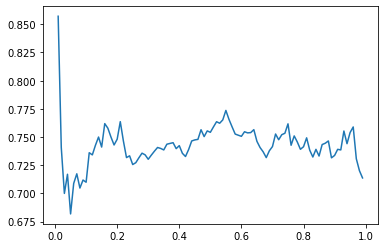

In [48]:
accuracy_score_lst, test_score_lst = get_accuracy_vs_test_score(feature_data=feature_data, prediction_data=prediction_data, random_state=20)
sns.lineplot(x=test_score_lst,y=accuracy_score_lst)
indx = accuracy_score_lst.index(max(accuracy_score_lst))
print("Max accuracy of {0} is obtained for a test_size  {1}".format(accuracy_score_lst[indx],test_score_lst[indx]))